<a href="https://colab.research.google.com/github/justorfc/DataAspirant_codes/blob/master/00_Notebook_Unificado_Transcripcion_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis automatizado de entrevistas: transcripción y análisis textual

Este notebook permite cargar archivos `.m4a` o `.txt`, y ejecuta automáticamente:
- Transcripción con Whisper si se carga un `.m4a`
- Análisis textual si se carga un `.txt`

## 1. Instalación de librerías necesarias

In [ ]:
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q nltk wordcloud
!sudo apt update && sudo apt install ffmpeg -y

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubun

## 2. Cargar archivo (audio o texto)

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print(f"Archivo cargado: {filename}")

Saving Voz 035.m4a to Voz 035.m4a
Archivo cargado: Voz 035.m4a


## 3. Procesamiento según tipo de archivo

In [ ]:
import whisper
import os

if filename.endswith('.m4a') or filename.endswith('.mp3') or filename.endswith('.wav'):
    print("Archivo de audio detectado. Iniciando transcripción...")
    model = whisper.load_model("base")
    result = model.transcribe(filename, language='es')
    texto = result['text']
    with open("transcripcion.txt", "w", encoding="utf-8") as f:
        f.write(texto)
    print("Transcripción completada. Texto extraído.")
elif filename.endswith('.txt'):
    print("Archivo de texto detectado. Leyendo contenido...")
    with open(filename, 'r', encoding='utf-8') as f:
        texto = f.read()
    print("Lectura completada.")
else:
    raise ValueError("Formato de archivo no válido. Por favor suba un archivo .txt o de audio (.m4a, .mp3)")

Archivo de audio detectado. Iniciando transcripción...


100%|███████████████████████████████████████| 139M/139M [00:03<00:00, 46.1MiB/s]


Transcripción completada. Texto extraído.


## 4. Limpieza y tokenización

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Tokenizar y eliminar palabras vacías
import re
from nltk.corpus import stopwords

# Tokenizar usando expresiones regulares
palabras = re.findall(r'\b\w+\b', texto.lower())

# Eliminar stopwords
stopwords_esp = set(stopwords.words('spanish'))
tokens = [p for p in palabras if p not in stopwords_esp]

print(tokens[:20])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['primera', 'entrevista', 'acto', 'directivo', 'aérete', 'dr', 'juan', 'sanbrano', 'constructores', 'pede', 'inicios', 'gracias', 'generosidad', 'atendiendo', 'responder', 'cinco', 'preguntas', 'parte', 'estudio', 'caso']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 5. Frecuencia de palabras

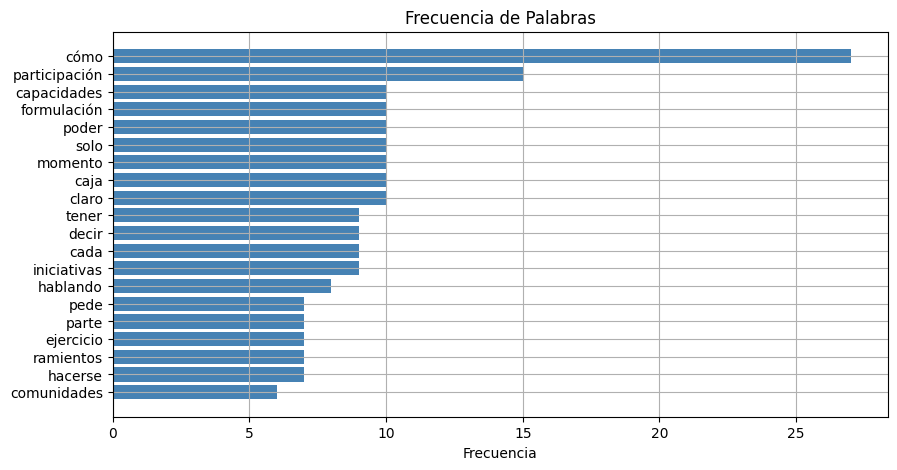

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

frecuencias = Counter(tokens)
top_palabras = frecuencias.most_common(20)

plt.figure(figsize=(10,5))
plt.barh([p[0] for p in reversed(top_palabras)], [p[1] for p in reversed(top_palabras)], color='steelblue')
plt.title('Frecuencia de Palabras')
plt.xlabel('Frecuencia')
plt.grid(True)
plt.show()

## 6. Nube de palabras

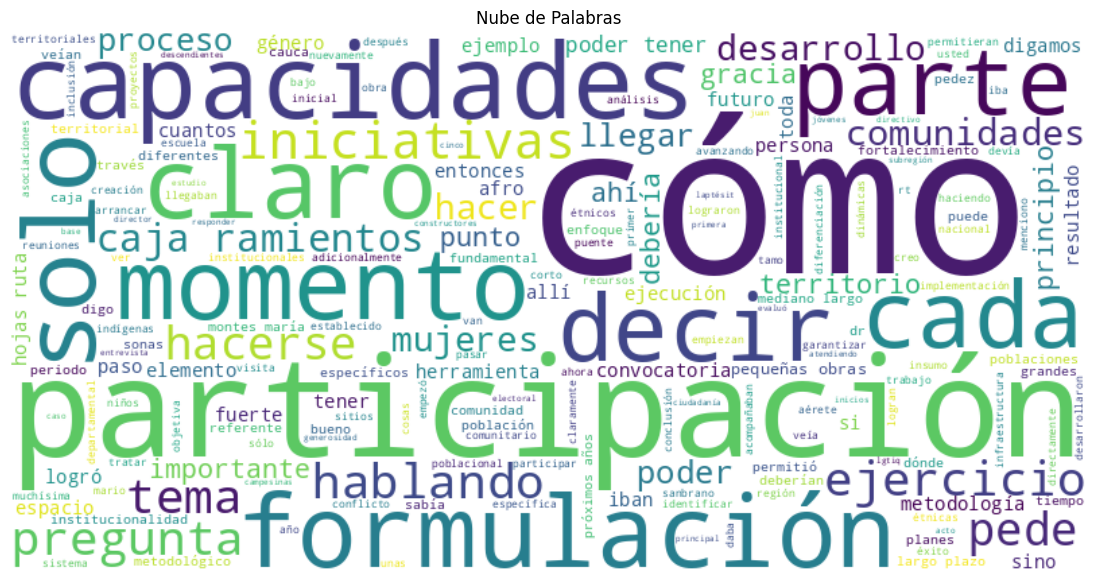

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

## 7. Bigramas

In [ ]:
from nltk.util import ngrams

bigrams = list(ngrams(tokens, 2))
bigramas_contados = Counter(bigrams).most_common(10)
for par, freq in bigramas_contados:
    print(f"{' '.join(par)}: {freq}")

caja ramientos: 7
poder tener: 5
participación comunidades: 4
hojas ruta: 4
pequeñas obras: 4
formulación pede: 3
montes maría: 3
debería hacerse: 3
próximos años: 3
mediano largo: 3


## 8. Concordancia de palabra clave

In [ ]:
clave = "comunidad"
contextos = re.findall(r".{0,40}" + clave + r".{0,40}", texto, flags=re.IGNORECASE)
for i, c in enumerate(contextos[:10], 1):
    print(f"{i}. ...{c}...")

1. ...te, como evaluó la participación de las comunidades campesinas, indígenas, afro descendie...
2. ...s institucionales que permitieran a las comunidades, expresar sus necesidades y prioridad...
3. ...todológico para la participación de las comunidades, desde la convocatoria, incluyendo lo...
4. ...ue las propuestas y perspectivas de las comunidades pueden incorporar en las decisiones d...
5. ...tificó la RT en la participación de las comunidades, en la planificación de los PDT y PAT...
6. ...n y el desarrollo de la capacidad de la comunidad. Por eso, para mí es muy importante el ...
7. ...ticipación o de la participación de las comunidades en el fortalecimiento institucional y...
8. ... estructura comunitaria, donde ya es la comunidad de la ejecutora y quienes acompañaban n...
9. ...n, como presentaban su información a la comunidad, como ellos generaban esas dinámicas de...


## 9. Conclusión

Este notebook permite transcribir y analizar entrevistas desde un único flujo de trabajo automatizado. Puede usarse para múltiples archivos repitiendo el proceso.